Modelo CNN 1D con datos sin coordenadas


*   Parches de 10 pixeles
*   Corte 76
*   Test = Test4 = Paciente 8

In [ ]:
#Librerias
from time import time
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

eje=np.zeros((271,271))  #Imagen CT sintetica
npix=10 #Tamaño parche
corte=76 #Corte del estudio (271x271)

In [ ]:
#Funcion para ver los datos de los estudios
def datosImagen(data,letra,num):
  mindata,maxdata=np.min(data),np.max(data)
  print("data"+letra+num," ",'Minimo: ',mindata,', Maximo: ',maxdata,', Tamaño: ',data.shape,', Canales: ',data.ndim)

In [ ]:
#Funciones para Normalizar y Desnormalizar una imagen
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def Un_NormalizeData(data,minData,maxData):
    return (data*(maxData-minData)+minData)

In [ ]:
#Funcion para obtener los pixeles vecinos
def neightPixel(Ix):
  #Llenar los Parches con bordes de 0's.
  aux_Ix=Ix.reshape(npix,npix)
  zero_Ix=[[0 for i in range(npix+2)]for j in range(npix+2)]
  for i in range(npix):
    zero_Ix[i+1][1:-1]=aux_Ix[i]

  #print(zero_Ix)
  N,S,E,O,NE,NO,SE,SO=[],[],[],[],[],[],[],[]
  for i in range(1,npix+1):
    for j in range(1,npix+1):
      N.append(zero_Ix[i-1][j])
      S.append(zero_Ix[i+1][j])
      E.append(zero_Ix[i][j+1])
      O.append(zero_Ix[i][j-1])
      NE.append(zero_Ix[i-1][j+1])
      NO.append(zero_Ix[i-1][j-1])
      SE.append(zero_Ix[i+1][j+1])
      SO.append(zero_Ix[i+1][j-1])
  neight=[N,S,E,O,NE,NO,SE,SO]
  return neight

In [ ]:
#Funcion que sirve para construir la imagen sintetica CT parche por parche
def construirImage(imag,cord1,cord2):
  global eje
  imagen=imag
  pos=cord1
  pos2=cord2
  cnt=0
  for i in range(0,271):
    if(i>=pos2 and i<pos2+npix):
      #print(i,"=============",cnt)
      cnt2=0
      for j in range(0,271):
        if(j>=pos and j<pos+npix):
          #print(j,cnt2)
          eje[i][j]=imagen[cnt][cnt2]
          cnt2+=1
      cnt+=1


In [ ]:
#Funciones que sirven para eliminar los valores atipicos (mayores y menores) de la CT sintetica,
#reemplazando los valores atipicos por datos de entrenamiento
def eliminarMax(data,maximos):
  global maxTrain
  tam=maximos[0].shape[0]
  i=0
  while(i<tam):
    posx=maximos[0][i]
    posy=maximos[1][i]
    data[posx,posy]=maxTrain
    i+=1
  return data

def eliminarMin(data,minimos):
  global minTrain
  tam=minimos[0].shape[0]
  i=0
  while(i<tam):
    posx=minimos[0][i]
    posy=minimos[1][i]
    data[posx,posy]=minTrain
    i+=1
  return data

In [ ]:
#Contruir modelo CNN 1D
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = Sequential()
model.add(Conv1D(0.2*(npix*npix), 5, activation="relu", input_shape=(9,1)))
model.add(Conv1D(64,5,activation='relu',padding='same'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss="mse", optimizer=opt)
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 20)             120       
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             6464      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 256)               82176     
                                                        

In [ ]:
#Leer estudios
#MRI
img_MRI1 = nib.load('001_MRI.nii.gz')
datax1 = img_MRI1.get_fdata()
img_MRI2 = nib.load('002_MRI.nii.gz')
datax2 = img_MRI2.get_fdata()
img_MRI3 = nib.load('003_MRI.nii.gz')
datax3 = img_MRI3.get_fdata()
img_MRI4 = nib.load('004_MRI.nii.gz')
datax4 = img_MRI4.get_fdata()
img_MRI5 = nib.load('005_MRI.nii.gz')
datax5 = img_MRI5.get_fdata()
img_MRI6 = nib.load('006_MRI.nii.gz')
datax6 = img_MRI6.get_fdata()
img_MRI7 = nib.load('007_MRI.nii.gz')
datax7 = img_MRI7.get_fdata()
img_MRI8 = nib.load('008_MRI.nii.gz')
datax8 = img_MRI8.get_fdata()
img_MRI9 = nib.load('009_MRI.nii.gz')
datax9 = img_MRI9.get_fdata()
img_MRI10 = nib.load('010_MRI.nii.gz')
datax10 = img_MRI10.get_fdata()

#CTs
img_CT1 = nib.load('001_CT.nii.gz')
datay1 = img_CT1.get_fdata() 
img_CT2 = nib.load('002_CT.nii.gz')
datay2 = img_CT2.get_fdata()
img_CT3 = nib.load('003_CT.nii.gz')
datay3 = img_CT3.get_fdata()
img_CT4 = nib.load('004_CT.nii.gz')
datay4 = img_CT4.get_fdata()
img_CT5 = nib.load('005_CT.nii.gz')
datay5 = img_CT5.get_fdata()
img_CT6 = nib.load('006_CT.nii.gz')
datay6 = img_CT6.get_fdata()
img_CT7 = nib.load('007_CT.nii.gz')
datay7 = img_CT7.get_fdata()
img_CT8 = nib.load('008_CT.nii.gz')
datay8 = img_CT8.get_fdata()
img_CT9 = nib.load('009_CT.nii.gz')
datay9 = img_CT9.get_fdata()
img_CT10 = nib.load('010_CT.nii.gz')
datay10 = img_CT10.get_fdata()

In [ ]:
#Visualziar Estudios
print("Estudios MRI")
datosImagen(datax1,"x","1")
datosImagen(datax2,"x","2")
datosImagen(datax3,"x","3")
datosImagen(datax4,"x","4")
datosImagen(datax5,"x","5")
datosImagen(datax6,"x","6")
datosImagen(datax7,"x","7")
datosImagen(datax8,"x","8")
datosImagen(datax9,"x","9")
datosImagen(datax10,"x","10")
print()
print("Estudios CTs")
datosImagen(datay1,"y","1")
datosImagen(datay2,"y","2")
datosImagen(datay3,"y","3")
datosImagen(datay4,"y","4")
datosImagen(datay5,"y","5")
datosImagen(datay6,"y","6")
datosImagen(datay7,"y","7")
datosImagen(datay8,"y","8")
datosImagen(datay9,"y","9")
datosImagen(datay10,"y","10")
print()


Estudios MRI
datax1   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax2   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax3   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax4   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax5   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax6   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax7   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax8   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax9   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax10   Minimo:  0.0 , Maximo:  255.0 , Tamaño:  (271, 271, 221) , Canales:  3

Estudios CTs
datay1   Minimo:  -1025.0 , Maximo:  3110.0 , Tamaño:  (271, 271, 221) , Canales:  3
datay2   Minimo:  -1918.0 , Maximo:  3994.0 , Tamaño:  (271, 271, 221) , Canales:  3
da

In [ ]:
#Normalizar Estudios
#MRI
datax1N=NormalizeData(datax1)
datax2N=NormalizeData(datax2)
datax3N=NormalizeData(datax3)
datax4N=NormalizeData(datax4)
datax5N=NormalizeData(datax5)
datax6N=NormalizeData(datax6)
datax7N=NormalizeData(datax7)
datax8N=NormalizeData(datax8)
datax9N=NormalizeData(datax9)
datax10N=NormalizeData(datax10)

#CTs
datay1N=NormalizeData(datay1)
datay2N=NormalizeData(datay2)
datay3N=NormalizeData(datay3)
datay4N=NormalizeData(datay4)
datay5N=NormalizeData(datay5)
datay6N=NormalizeData(datay6)
datay7N=NormalizeData(datay7)
datay8N=NormalizeData(datay8)
datay9N=NormalizeData(datay9)
datay10N=NormalizeData(datay10)

In [ ]:
#Visualziar Estudios Normalizados
print("Estudios Normalizados MRI")
datosImagen(datax1N,"x","1")
datosImagen(datax2N,"x","2")
datosImagen(datax3N,"x","3")
datosImagen(datax4N,"x","4")
datosImagen(datax5N,"x","5")
datosImagen(datax6N,"x","6")
datosImagen(datax7N,"x","7")
datosImagen(datax8N,"x","8")
datosImagen(datax9N,"x","9")
datosImagen(datax10N,"x","10")
print()
print("Estudios Normalizados CTs")
datosImagen(datay1N,"y","1")
datosImagen(datay2N,"y","2")
datosImagen(datay3N,"y","3")
datosImagen(datay4N,"y","4")
datosImagen(datay5N,"y","5")
datosImagen(datay6N,"y","6")
datosImagen(datay7N,"y","7")
datosImagen(datay8N,"y","8")
datosImagen(datay9N,"y","9")
datosImagen(datay10N,"y","10")
print()

Estudios Normalizados MRI
datax1   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax2   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax3   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax4   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax5   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax6   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax7   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax8   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax9   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datax10   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3

Estudios Normalizados CTs
datay1   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datay2   Minimo:  0.0 , Maximo:  1.0 , Tamaño:  (271, 271, 221) , Canales:  3
datay3   M

In [ ]:
#Visualziar Datos en el Corte Asignado
print("Corte",corte,"MRI")
datosImagen(datax1[:,:,corte],"x","1")
datosImagen(datax2[:,:,corte],"x","2")
datosImagen(datax3[:,:,corte],"x","3")
datosImagen(datax4[:,:,corte],"x","4")
datosImagen(datax5[:,:,corte],"x","5")
datosImagen(datax6[:,:,corte],"x","6")
datosImagen(datax7[:,:,corte],"x","7")
datosImagen(datax8[:,:,corte],"x","8")
datosImagen(datax9[:,:,corte],"x","9")
datosImagen(datax10[:,:,corte],"x","10")
print()
print("Corte",corte,"CTs")
datosImagen(datay1[:,:,corte],"y","1")
datosImagen(datay2[:,:,corte],"y","2")
datosImagen(datay3[:,:,corte],"y","3")
datosImagen(datay4[:,:,corte],"y","4")
datosImagen(datay5[:,:,corte],"y","5")
datosImagen(datay6[:,:,corte],"y","6")
datosImagen(datay7[:,:,corte],"y","7")
datosImagen(datay8[:,:,corte],"y","8")
datosImagen(datay9[:,:,corte],"y","9")
datosImagen(datay10[:,:,corte],"y","10")
print()

Corte 76 MRI
datax1   Minimo:  11.0 , Maximo:  230.0 , Tamaño:  (271, 271) , Canales:  2
datax2   Minimo:  7.0 , Maximo:  217.0 , Tamaño:  (271, 271) , Canales:  2
datax3   Minimo:  10.0 , Maximo:  237.0 , Tamaño:  (271, 271) , Canales:  2
datax4   Minimo:  7.0 , Maximo:  229.0 , Tamaño:  (271, 271) , Canales:  2
datax5   Minimo:  5.0 , Maximo:  220.0 , Tamaño:  (271, 271) , Canales:  2
datax6   Minimo:  10.0 , Maximo:  225.0 , Tamaño:  (271, 271) , Canales:  2
datax7   Minimo:  7.0 , Maximo:  230.0 , Tamaño:  (271, 271) , Canales:  2
datax8   Minimo:  8.0 , Maximo:  217.0 , Tamaño:  (271, 271) , Canales:  2
datax9   Minimo:  9.0 , Maximo:  211.0 , Tamaño:  (271, 271) , Canales:  2
datax10   Minimo:  9.0 , Maximo:  230.0 , Tamaño:  (271, 271) , Canales:  2

Corte 76 CTs
datay1   Minimo:  -1024.0 , Maximo:  2388.0 , Tamaño:  (271, 271) , Canales:  2
datay2   Minimo:  -1041.0 , Maximo:  2610.0 , Tamaño:  (271, 271) , Canales:  2
datay3   Minimo:  -1045.0 , Maximo:  2507.0 , Tamaño:  (271

In [ ]:
#Visualziar Datos Normalizados en el Corte Asignado
print("Corte",corte,"MRI")
datosImagen(datax1N[:,:,corte],"x","1")
datosImagen(datax2N[:,:,corte],"x","2")
datosImagen(datax3N[:,:,corte],"x","3")
datosImagen(datax4N[:,:,corte],"x","4")
datosImagen(datax5N[:,:,corte],"x","5")
datosImagen(datax6N[:,:,corte],"x","6")
datosImagen(datax7N[:,:,corte],"x","7")
datosImagen(datax8N[:,:,corte],"x","8")
datosImagen(datax9N[:,:,corte],"x","9")
datosImagen(datax10N[:,:,corte],"x","10")
print()
print("Corte",corte,"CTs")
datosImagen(datay1N[:,:,corte],"y","1")
datosImagen(datay2N[:,:,corte],"y","2")
datosImagen(datay3N[:,:,corte],"y","3")
datosImagen(datay4N[:,:,corte],"y","4")
datosImagen(datay5N[:,:,corte],"y","5")
datosImagen(datay6N[:,:,corte],"y","6")
datosImagen(datay7N[:,:,corte],"y","7")
datosImagen(datay8N[:,:,corte],"y","8")
datosImagen(datay9N[:,:,corte],"y","9")
datosImagen(datay10N[:,:,corte],"y","10")
print()

Corte 76 MRI
datax1   Minimo:  0.043137254901960784 , Maximo:  0.9019607843137255 , Tamaño:  (271, 271) , Canales:  2
datax2   Minimo:  0.027450980392156862 , Maximo:  0.8509803921568627 , Tamaño:  (271, 271) , Canales:  2
datax3   Minimo:  0.0392156862745098 , Maximo:  0.9294117647058824 , Tamaño:  (271, 271) , Canales:  2
datax4   Minimo:  0.027450980392156862 , Maximo:  0.8980392156862745 , Tamaño:  (271, 271) , Canales:  2
datax5   Minimo:  0.0196078431372549 , Maximo:  0.8627450980392157 , Tamaño:  (271, 271) , Canales:  2
datax6   Minimo:  0.0392156862745098 , Maximo:  0.8823529411764706 , Tamaño:  (271, 271) , Canales:  2
datax7   Minimo:  0.027450980392156862 , Maximo:  0.9019607843137255 , Tamaño:  (271, 271) , Canales:  2
datax8   Minimo:  0.03137254901960784 , Maximo:  0.8509803921568627 , Tamaño:  (271, 271) , Canales:  2
datax9   Minimo:  0.03529411764705882 , Maximo:  0.8274509803921568 , Tamaño:  (271, 271) , Canales:  2
datax10   Minimo:  0.03529411764705882 , Maximo:  

In [ ]:
#Funcion para encontrar el maximo y minimo de entrenamiento en el corte CT asignado
def MaxMinTraining(corte1,corte2,corte3,corte4,corte5,corte6):
  arrMax=np.array([corte1.max(),corte2.max(),corte3.max(),corte4.max(),corte5.max(),corte6.max()])
  arrMin=np.array([corte1.min(),corte2.min(),corte3.min(),corte4.min(),corte5.min(),corte6.min()])
  return arrMax.max(),arrMin.min()

maxTrain,minTrain=MaxMinTraining(datay1[:,:,corte],datay3[:,:,corte],datay5[:,:,corte],datay7[:,:,corte],datay9[:,:,corte],datay10[:,:,corte])
print(maxTrain,minTrain)

2578.0 -1119.0


In [ ]:
#Separacion por parches
tamImage=270
tamImage2=270
inicio2=0
while(inicio2<tamImage2):
  inicio=0
  while(inicio<tamImage):
    #Parche MRI
    Itempx1=datax1N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix1=np.matrix.flatten(Itempx1)
    Itempx2=datax2N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix2=np.matrix.flatten(Itempx2)
    Itempx3=datax3N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix3=np.matrix.flatten(Itempx3)
    Itempx4=datax4N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix4=np.matrix.flatten(Itempx4)
    Itempx5=datax5N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix5=np.matrix.flatten(Itempx5)
    Itempx6=datax6N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix6=np.matrix.flatten(Itempx6)
    Itempx7=datax7N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix7=np.matrix.flatten(Itempx7)
    Itempx8=datax8N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix8=np.matrix.flatten(Itempx8)
    Itempx9=datax9N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix9=np.matrix.flatten(Itempx9)
    Itempx10=datax10N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Ix10=np.matrix.flatten(Itempx10)

    #Parche CTs
    Itempy1=datay1N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy1=np.matrix.flatten(Itempy1)
    Itempy2=datay2N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy2=np.matrix.flatten(Itempy2)
    Itempy3=datay3N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy3=np.matrix.flatten(Itempy3)
    Itempy4=datay4N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy4=np.matrix.flatten(Itempy4)
    Itempy5=datay5N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy5=np.matrix.flatten(Itempy5)
    Itempy6=datay6N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy6=np.matrix.flatten(Itempy6)
    Itempy7=datay7N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy7=np.matrix.flatten(Itempy7)
    Itempy8=datay8N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy8=np.matrix.flatten(Itempy8)
    Itempy9=datay9N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy9=np.matrix.flatten(Itempy9)
    Itempy10=datay10N[inicio:inicio+npix,inicio2:inicio2+npix,corte]
    Iy10=np.matrix.flatten(Itempy10)
    #===========================================================================================
    #Datos de entrenamiento y test
    #MRI
    XTrain1=np.zeros((npix*npix,9))
    neight=neightPixel(Ix1)
    XTrain1[:,0]=Ix1 #intensidad del pixel
    XTrain1[:,1]=neight[0] #pixel del norte
    XTrain1[:,2]=neight[1] #pixel del sur
    XTrain1[:,3]=neight[2] #pixel del este
    XTrain1[:,4]=neight[3] #pixel del oeste
    XTrain1[:,5]=neight[4] #pixel del noreste
    XTrain1[:,6]=neight[5] #pixel del noroeste
    XTrain1[:,7]=neight[6] #pixel del sureste
    XTrain1[:,8]=neight[7] #pixel del suroeste

    XTrain2=np.zeros((npix*npix,9))
    neight=neightPixel(Ix3)
    XTrain2[:,0],XTrain2[:,1],XTrain2[:,2],XTrain2[:,3],XTrain2[:,4]=Ix3,neight[0],neight[1],neight[2],neight[3]
    XTrain2[:,5],XTrain2[:,6],XTrain2[:,7],XTrain2[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTrain3=np.zeros((npix*npix,9))
    neight=neightPixel(Ix5)
    XTrain3[:,0],XTrain3[:,1],XTrain3[:,2],XTrain3[:,3],XTrain3[:,4]=Ix5,neight[0],neight[1],neight[2],neight[3]
    XTrain3[:,5],XTrain3[:,6],XTrain3[:,7],XTrain3[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTrain4=np.zeros((npix*npix,9))
    neight=neightPixel(Ix7)
    XTrain4[:,0],XTrain4[:,1],XTrain4[:,2],XTrain4[:,3],XTrain4[:,4]=Ix7,neight[0],neight[1],neight[2],neight[3]
    XTrain4[:,5],XTrain4[:,6],XTrain4[:,7],XTrain4[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTrain5=np.zeros((npix*npix,9))
    neight=neightPixel(Ix9)
    XTrain5[:,0],XTrain5[:,1],XTrain5[:,2],XTrain5[:,3],XTrain5[:,4]=Ix9,neight[0],neight[1],neight[2],neight[3]
    XTrain5[:,5],XTrain5[:,6],XTrain5[:,7],XTrain5[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTrain6=np.zeros((npix*npix,9))
    neight=neightPixel(Ix10)
    XTrain6[:,0],XTrain6[:,1],XTrain6[:,2],XTrain6[:,3],XTrain6[:,4]=Ix10,neight[0],neight[1],neight[2],neight[3]
    XTrain6[:,5],XTrain6[:,6],XTrain6[:,7],XTrain6[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTest1=np.zeros((npix*npix,9))
    neight=neightPixel(Ix2)
    XTest1[:,0],XTest1[:,1],XTest1[:,2],XTest1[:,3],XTest1[:,4]=Ix2,neight[0],neight[1],neight[2],neight[3]
    XTest1[:,5],XTest1[:,6],XTest1[:,7],XTest1[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTest2=np.zeros((npix*npix,9))
    neight=neightPixel(Ix4)
    XTest2[:,0],XTest2[:,1],XTest2[:,2],XTest2[:,3],XTest2[:,4]=Ix4,neight[0],neight[1],neight[2],neight[3]
    XTest2[:,5],XTest2[:,6],XTest2[:,7],XTest2[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTest3=np.zeros((npix*npix,9))
    neight=neightPixel(Ix6)
    XTest3[:,0],XTest3[:,1],XTest3[:,2],XTest3[:,3],XTest3[:,4]=Ix6,neight[0],neight[1],neight[2],neight[3]
    XTest3[:,5],XTest3[:,6],XTest3[:,7],XTest3[:,8]=neight[4],neight[5],neight[6],neight[7]

    XTest4=np.zeros((npix*npix,9))
    neight=neightPixel(Ix8)
    XTest4[:,0],XTest4[:,1],XTest4[:,2],XTest4[:,3],XTest4[:,4]=Ix8,neight[0],neight[1],neight[2],neight[3]
    XTest4[:,5],XTest4[:,6],XTest4[:,7],XTest4[:,8]=neight[4],neight[5],neight[6],neight[7]
    #======================================================================================================
    #Datos de entrenamiento y test
    #CTs
    YTrain1=Iy1
    YTrain2=Iy3
    YTrain3=Iy5
    YTrain4=Iy7
    YTrain5=Iy9
    YTrain6=Iy10
    
    YTest1=Iy2
    YTest2=Iy4
    YTest3=Iy6
    YTest4=Iy8
    #=======================================================================================================
    #Juntar estudios
    XTrain=np.concatenate((XTrain1,XTrain2,XTrain3,XTrain4,XTrain5,XTrain6), axis=0)
    XTrain=XTrain.reshape(XTrain.shape[0], XTrain.shape[1], 1)

    XTest=XTest4
    XTest=XTest.reshape(XTest.shape[0],XTest.shape[1], 1)

    YTrain=np.concatenate((YTrain1,YTrain2,YTrain3,YTrain4,YTrain5,YTrain6), axis=0)

    YTest=YTest4
    #================================================================================================================
    #Entrenar modelo
    model.fit(XTrain, YTrain, batch_size=100,epochs=2000, verbose=0)
    ypred = model.predict(XTest)
    #Construir CT Sintetica
    Ipred=ypred.reshape(npix,-1)
    construirImage(Ipred,inicio2,inicio)
    print("Finish:============================================")
    inicio+=npix
    #finishSegundoWhile
  inicio2+=npix
  #finishSegundoWhile

#Desnormalizar la prediccion
eje=Un_NormalizeData(eje,datay8.min(),datay8.max())

#Buscamos los minimos y maximos en la imagen completa
minimos=np.where(eje<minTrain)
maximos=np.where(eje>maxTrain)
eje=eliminarMax(eje,maximos)
eje=eliminarMin(eje,minimos)

Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:============================================
Finish:=====

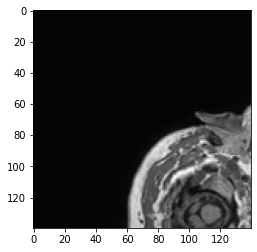

In [ ]:
plt.imshow(datax8[0:140,0:140,76], cmap="gray")

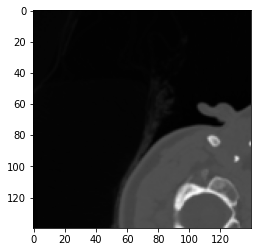

In [ ]:
plt.imshow(datay8[0:140,0:140,76], cmap="gray")

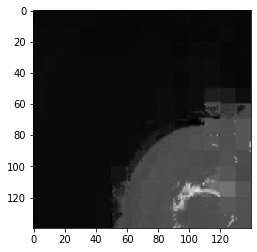

In [ ]:
plt.imshow(eje[0:140,0:140], cmap="gray")

In [ ]:
#np.savetxt("CNN1DNoCoorP1.csv", eje[0:140,0:140], delimiter=",")
#np.savetxt("CNN1DNoCoorP2.csv", eje[0:140,140:270], delimiter=",")
#np.savetxt("CNN1DNoCoorP3.csv", eje[140:270,0:140], delimiter=",")
#np.savetxt("CNN1DNoCoorP4.csv", eje[140:270,140:270], delimiter=",")